<a href="https://colab.research.google.com/github/Rik1995/Play-Store-App-Review-Analysis/blob/main/my_capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

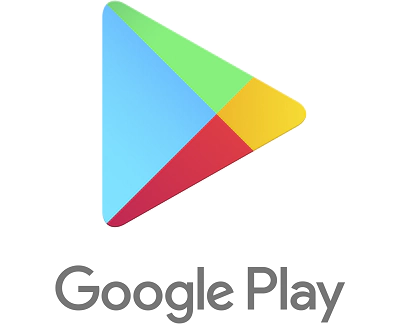

### **📱 Hi everybody !**

In this notebook, I'm gonna analyze Google Play Store datas. While I was analyzing the data, I used Python. This study is my first data analyzing study.

Google Play Store apps and reviews Mobile apps are everywhere. They are easy to create and can be lucrative. Because of these two factors, more and more apps are being developed. In this notebook, we will do a comprehensive analysis of the Android app market by comparing over ten thousand apps in Google Play across different categories. We'll look for insights in the data to devise strategies to drive growth and retention.

Let's take a look at the data, which consists of two files:

* **playstore data.csv:** contains all the details of the applications on Google Play. There are 13 features that describe a given app.
* **user_reviews.csv:** contains 100 reviews for each app, most helpful first. The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity.

Before jumping into the data's provided, let me first explain you about the EDA analysis.

# **Problem Statements**
1. What are the top categories on Play Store?
2. Are majority of the apps Paid or Free?
3. How important is the rating of the application?
4. Which categories from the audience should the app be based on?
5. Which category has the most no. of installations?
6. How does the count of apps varies by Genres?
7. How does the last update has an effect on the rating?
8. How are ratings affected when the app is a paid one?
9. How are reviews and ratings co-related?
10. Lets us discuss the sentiment subjectivity.
11. Is subjectivity and polarity proportional to each other?
12. What is the percentage of review sentiments?
13. How is sentiment polarity varying for paid and free apps?
14. How Content Rating affect over the App?
15. Does Last Update date has an effects on rating?
16. Distribution of App update over the Year.
17. Distribution of Paid and Free app updated over the Month.

# **What is Exploratory Data Analysis?**
Exploratory data analysis (EDA) is used by data scientists to analyze and investigate data sets for patterns, and anomalies (outliers), and form hypotheses based on our understanding of the dataset and summarize their main characteristics, often employing data visualization methods. It is an important step in any Data Analysis or Data Science project. It helps determine how best to manipulate data sources to get the answers you need.

EDA involves generating summary statistics for numerical data in the dataset and creating various graphical representations to understand the data better and make it more attractive and appealing.

The following are the various steps involved in the EDA process:
1. <b>Problem Statement</b> - We shall brainstorm and understand the given data set. We shall study the attributes present in it and try to do a philosophical analysis about their meaning and importance for this problem.
2. <b>Hypothesis</b> - Upon studying the attributes present in the data base, we shall develop some basic hypothesis on which we can work and play with the data to look for the varied results which we can get out of it.
3. <b>Univariate Analysis</b> - It is the simplest form of analyzing the data. In this we would initially pick up a single attribute and study it in and out. It doesn't deal with any sort of co-relation and it's major purpose is to describe. It takes data, summarizes that data and finds patterns in the data.
4. <b>Bivariate Analysis</b> - This analysis is related to cause and the relationship between the two attributes. We will try to understand the dependency of attributes on each other.
5. <b>Multivariate Analysis</b> - This is done when more than two variables have to be analyzed simultaneously.
5. <b>Data Cleaning</b> - We shall clean the dataset and handle the missing data, outliers and categorical variables.
6. <b>Testing Hypothesis</b> - We shall check if our data meets the assumptions required by most of the multivariate techniques.

# **1.Importing Libraries:**



In [35]:
#import library
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool
from datetime import datetime
# plotly
import plotly 
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import warnings
#sns.set(font_scale=1.5)
warnings.filterwarnings("ignore")

# **2.Mounting Drive:**


In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **3.Reading Data:**

In [37]:
# loading csv File
file_path = '/content/drive/MyDrive/capstone/Play Store Data.csv'
df=pd.read_csv(file_path)

# **4.Basic Data Exploration:**

###**4.1 Head**

In [38]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


###**4.2  Tail**

In [39]:
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


###**4.3 Shape**

In [40]:
df.shape

(10841, 13)

###**4.4  Rows & Columns**

In [41]:
rows = df.shape[0]
columns = df.shape[1]
print(f"The no of rows is {rows} and no of columns is {columns}")

The no of rows is 10841 and no of columns is 13


###**4.5  Info**

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


###**4.6  Describe**

In [43]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


###**4.7   Columns Names** 

In [44]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


1. **App** - It tells us about the name of the application with a short description (optional).
2. **Category** - It gives the category to the app.
3. **Rating** - It contains the average rating the respective app received from its users.
4. **Reviews** - It tells us about the total number of users who have given a review for the application.
5. **Size** - It tells us about the size being occupied the application on the mobile phone.
6. **Installs** - It tells us about the total number of installs/downloads for an application.
7. **Type** - IIt states whether an app is free to use or paid.
8. **Price** - It gives the price payable to install the app. For free type apps, the price is zero.
9. **Content Rating** - It states whether or not an app is suitable for all age groups or not.
10. **Genres** - It tells us about the various other categories to which an application can belong.
11. **Last Updated** - It tells us about the when the application was updated.
12. **Current Ver** - It tells us about the current version of the application.
13.**Android Ver** - It tells us about the android version which can support the application on its platform.

#  **5.Data cleaning & Data visualisation:**

A careful glance of the dataset reveals that some of these columns mandate data cleaning in order to be consumed by code we'll write later. Specifically, the presence of special characters (, $ +) and letters (M k) in the Installs, Size, and Price columns make their conversion to a numerical data type difficult. Let's clean by removing these and converting each column to a numeric type.

## *5.1 Let's check the no of NaN value present in each column*

In [45]:
nan_values=(df.isnull().sum())
print(nan_values)

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


As we can see Rating column is having highest no of NaN values.
As there are 1474 missing values in rating so the possible way here is to get the median, mean or mode of column Rating and replace that value with the missing values.

In [46]:
mean_rating = df['Rating'].mean()
mean_rating

4.193338315362443

In [47]:
median_rating = df['Rating'].median()
median_rating

4.3

In [48]:
mode_rating = df['Rating'].mode()
mode_rating

0    4.4
dtype: float64

Here we can see based on our analysis mode > median > mean which is clear direction of negative skewness so to reduce we would replace Nan with mean rating.

In [ ]:
df['Rating'] = df['Rating'].fillna(mean_rating)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Let's remove all the rows having the missing values

In [30]:
df1 = df.dropna()

In [50]:
#checking the info again
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  object 
 4   Size            10829 non-null  object 
 5   Installs        10829 non-null  object 
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  object 
 8   Content Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last Updated    10829 non-null  object 
 11  Current Ver     10829 non-null  object 
 12  Android Ver     10829 non-null  object 
 13  Ratig           10829 non-null  float64
dtypes: float64(2), object(12)
memory usage: 1.2+ MB


After watching the above data what we can conclude all the columns have String type data except Ratings which is float.

## *5.2  Dropping the duplicates values*

In [57]:
df2 = df1.drop_duplicates()
df2.shape

(10346, 14)

In [59]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10346 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10346 non-null  object 
 1   Category        10346 non-null  object 
 2   Rating          10346 non-null  float64
 3   Reviews         10346 non-null  object 
 4   Size            10346 non-null  object 
 5   Installs        10346 non-null  object 
 6   Type            10346 non-null  object 
 7   Price           10346 non-null  object 
 8   Content_Rating  10346 non-null  object 
 9   Genres          10346 non-null  object 
 10  Last_Updated    10346 non-null  object 
 11  Current_Ver     10346 non-null  object 
 12  Android_Ver     10346 non-null  object 
 13  Ratig           10346 non-null  float64
dtypes: float64(2), object(12)
memory usage: 1.2+ MB


## *5.3  In column name replaceing space( ) with underscore(_)*

In [53]:
df1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Ratig'],
      dtype='object')

In [55]:
df1.columns = [column.replace(' ','_') for column in df1.columns]
df1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Current_Ver',
       'Android_Ver', 'Ratig'],
      dtype='object')